<b>Preprocessing</b>

In [1]:
import pandas as pd
import glob

# Allows for printing all columns and increases width; debug utility
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Select only the data files in the data folder
#data_files = glob.glob('data/*data.csv')
data_files = sorted(glob.glob('data/*data.csv'))

# Create the dfs and merge them on the keys TIME and METROREG
merged_data = None
for file in data_files:
    current_df = pd.read_csv(file, encoding="ISO-8859-1")
    if merged_data is not None:
        merged_data = pd.merge(merged_data, current_df, on=["TIME", "METROREG"])
    else:
        merged_data = current_df

# Rename relevant columns and drop the useless ones
# Though, be aware that measurement information is also lost
renames = {'Value_x': 'employed_persons',
           'Value_y': 'gdp',
           'Value': 'population'}

droppes = ['UNIT_x', 'WSTATUS', 'NACE_R2', 'Flag and Footnotes_x',
           'UNIT_y', 'Flag and Footnotes_y', 'AGE', 'SEX', 'Flag and Footnotes']

filtered_data = merged_data.rename(columns=renames).drop(columns=droppes)

#print(filtered_data)

In [2]:
#Rows we want to remove
non_metro=['Non-metropolitan regions in Austria',
 'Non-metropolitan regions in Belgium',
 'Non-metropolitan regions in Bulgaria',
 'Non-metropolitan regions in Croatia',
 'Non-metropolitan regions in Czech Republic',
 'Non-metropolitan regions in Denmark',
 'Non-metropolitan regions in Estonia',
 'Non-metropolitan regions in Finland',
 'Non-metropolitan regions in Germany',
 'Non-metropolitan regions in Greece',
 'Non-metropolitan regions in Hungary',
 'Non-metropolitan regions in Ireland',
 'Non-metropolitan regions in Italy',
 'Non-metropolitan regions in Latvia',
 'Non-metropolitan regions in Lithuania',
 'Non-metropolitan regions in Malta',
 'Non-metropolitan regions in Netherlands',
 'Non-metropolitan regions in North Macedonia',
 'Non-metropolitan regions in Portugal',
 'Non-metropolitan regions in Romania',
 'Non-metropolitan regions in Serbia',
 'Non-metropolitan regions in Slovakia',
 'Non-metropolitan regions in Slovenia',
 'Non-metropolitan regions in Spain',
 'Non-metropolitan regions in Sweden',
 'Non-metropolitan regions in United Kingdom']
countries = ['United Kingdom',"West Midlands urban area","North Macedonia","Austria","Belgium","Bulgaria","Croatia","Cyprus","Czechia","Denmark","Estonia","Finland","France","Germany","Germany (until 1990 former territory of the FRG)","Greece","Hungary","Ireland","Italy","Latvia","Lithuania","Luxembourg","Malta","Netherlands","Poland","Portugal","Romania","Serbia","Slovakia","Slovenia","Spain","Sweden"]
countries.extend(non_metro)

In [16]:
filtered_data2=filtered_data
for i in countries:
    filtered_data2=filtered_data2[filtered_data2.METROREG!=i]

In [17]:
import numpy as np
import scipy

In [18]:
# Preprocessing on the population column
filtered_data2.population = filtered_data2.population.replace(':', np.nan) # replacing NAs (noted ':') by NaN
filtered_data2.population = filtered_data2['population'].replace(r',', '',regex=True)  # removing commas
filtered_data2.population = filtered_data2['population'].astype(float)  #changing column type

# Preprocessing on the GDP column
filtered_data2.gdp = filtered_data2.gdp.replace(':',np.nan )  # replacing missing values (noted ':') by NaN
filtered_data2.gdp = filtered_data2['gdp'].replace(r',', '',regex=True)  # removing commas
filtered_data2.gdp = filtered_data2['gdp'].astype(float)  # changing column type

# Employed_persons column
filtered_data2.employed_persons = filtered_data2.employed_persons.replace(':', np.nan)
filtered_data2.employed_persons = filtered_data2['employed_persons'].replace(r',', '',regex=True)
filtered_data2.employed_persons = filtered_data2['employed_persons'].astype(float)

In [19]:
filtered_data2[filtered_data2['METROREG'] == 'Roma']

,TIME,METROREG,employed_persons,gdp,population
2603,2000,Roma,1718.8,113416.07,NaN
2604,2001,Roma,1736.7,120648.20,3704765.0
2605,2002,Roma,1781.4,126515.83,3704522.0
2606,2003,Roma,1822.7,129519.63,3715202.0
2607,2004,Roma,1899.9,137763.33,3739767.0
2608,2005,Roma,1919.8,142083.95,3777674.0
2609,2006,Roma,1950.5,147783.45,3798630.0
2610,2007,Roma,2022.0,154221.73,3823955.0
2611,2008,Roma,2025.4,156050.12,3870783.0
2612,2009,Roma,2015.0,154172.03,3912714.0


In [20]:
#Define which cities should be removed from the dataset 
cities_removed = []
for v in filtered_data2['METROREG'].unique():
    if max(list(filtered_data2[filtered_data2['METROREG'] == v].isnull().sum()))>8:
        cities_removed.append(v)
print('Removed cities: ', cities_removed)


Removed cities:  ['Leipzig', 'Dresden', 'Göttingen', 'Schwerin', 'Rostock', 'Neubrandenburg', 'Görlitz', 'Aachen', 'Zwickau', 'Dublin', 'Cork', 'Amsterdam', 'Rotterdam', 'Leeuwarden', 'Lódz', 'Kraków', 'Wroclaw', 'Poznan', 'Gdansk', 'Szczecin', 'Bydgoszcz - Torún', 'Lublin', 'Katowice', 'Bialystok', 'Kielce', 'Olsztyn', 'Rzeszów', 'Opole', 'Czestochowa', 'Bielsko-Biala', 'Tarnów', 'Glasgow', 'Edinburgh', 'Belfast', 'Norway', 'Oslo', 'Bergen']


In [21]:
#Remove cities from the dataset
for i in cities_removed: 
    indexMetroreg = filtered_data2[filtered_data2['METROREG'] == i].index
    filtered_data2.drop(indexMetroreg, inplace=True)

print(filtered_data2['METROREG'].unique())

['Bruxelles / Brussel' 'Antwerpen' 'Gent' 'Charleroi' 'Liège' 'Sofia'
 'Plovdiv' 'Varna' 'Burgas' 'Praha' 'Brno' 'Ostrava' 'Plzen' 'København'
 'Århus' 'Odense' 'Aalborg' 'Berlin' 'Hamburg' 'München' 'Köln'
 'Frankfurt am Main' 'Stuttgart' 'Düsseldorf' 'Bremen' 'Hannover'
 'Nürnberg' 'Bielefeld' 'Halle an der Saale' 'Magdeburg' 'Wiesbaden'
 'Darmstadt' 'Freiburg im Breisgau' 'Regensburg' 'Erfurt' 'Augsburg'
 'Bonn' 'Karlsruhe' 'Mönchengladbach' 'Mainz' 'Ruhrgebiet' 'Kiel'
 'Saarbrücken' 'Koblenz' 'Kaiserslautern' 'Iserlohn' 'Flensburg'
 'Konstanz' 'Gießen' 'Bayreuth' 'Aschaffenburg' 'Rosenheim' 'Offenburg'
 'Schweinfurt' 'Wetzlar' 'Braunschweig-Salzgitter-Wolfsburg'
 'Mannheim-Ludwigshafen' 'Münster' 'Lübeck' 'Kassel' 'Osnabrück'
 'Oldenburg (Oldenburg)' 'Heidelberg' 'Paderborn' 'Würzburg' 'Bremerhaven'
 'Heilbronn' 'Ulm' 'Pforzheim' 'Ingolstadt' 'Reutlingen' 'Siegen'
 'Hildesheim' 'Wuppertal' 'Düren' 'Bocholt' 'Tallinn' 'Athina'
 'Thessaloniki' 'Madrid' 'Barcelona' 'Valencia' 'Sevilla

In [22]:
from scipy.optimize import curve_fit

def F(x,a,b):
    return a*x+b

def nan_position(k):
    z=np.argwhere(np.isnan(np.array(k)))
    l=[]
    for i in z:
        l.append(i[0])
    return l

def treat_missing(k):
    #
    #if not enough values-> drop the city, threshold of 8 missing values per column
    #if all(x <=8 for x in list(k.isnull().sum())) == True:
        #cities_removed.append(v)
    #employed_persons
    missing=k.isnull().sum()    
    
    if missing[2] != 0: #linear regression on employed persons
        L1=list(k.employed_persons)
        m1=nan_position(k.employed_persons) #gets position of missing
        X1=[i for i in range(len(list(k.employed_persons))) if str(list(k.employed_persons)[i])!='nan']
        Y1=[i for i in list(k.employed_persons) if str(i)!='nan']
        params1 = curve_fit(F, xdata=X1, ydata=Y1) #performs linear regression, params[0] contains a and b
        for i in m1:
            L1[i] = params1[0][0]*i + params1[0][1]
        k.employed_persons = L1
    
    if missing[3] != 0: #linear regression on gdp
        L2=list(k.gdp)
        m2=nan_position(k.gdp) #gets position of missing
        X2=[i for i in range(len(list(k.gdp))) if str(list(k.gdp)[i])!='nan']
        Y2=[i for i in list(k.gdp) if str(i)!='nan']
        params2 = curve_fit(F, xdata=X2, ydata=Y2) #performs linear regression, params[0] contains a and b
        for i in m2:
            L2[i] = params2[0][0]*i + params2[0][1]
        k.gdp = L2
        
    if missing[4] != 0: #linear regression on population
        L3=list(k.population)
        m3=nan_position(k.population) #gets position of missing
        X3=[i for i in range(len(list(k.population))) if str(list(k.population)[i])!='nan']
        Y3=[i for i in list(k.population) if str(i)!='nan']
        params3 = curve_fit(F, xdata=X3, ydata=Y3) #performs linear regression, params[0] contains a and b
        for i in m3:
            L3[i] = params3[0][0]*i + params3[0][1]
        k.population = L3   
        
    return k



In [23]:
filtered_data3 = pd.DataFrame(columns=['TIME', 'METROREG', 'employed_persons', 'gdp', 'population'])


In [24]:
filtered_data3



,TIME,METROREG,employed_persons,gdp,population


In [25]:
for v in filtered_data2['METROREG'].unique():
    a = treat_missing(filtered_data2[filtered_data2['METROREG'] == v])
    filtered_data3 = filtered_data3.append(a)



C:\Users\Zoey\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
filtered_data3

,TIME,METROREG,employed_persons,gdp,population
19,2000,Bruxelles / Brussel,1075.0,77281.00,2129716.0
20,2001,Bruxelles / Brussel,1100.0,81082.00,2138898.0
21,2002,Bruxelles / Brussel,1089.0,83710.00,2159154.0
22,2003,Bruxelles / Brussel,1088.4,85529.56,2178354.0
23,2004,Bruxelles / Brussel,1093.9,90776.48,2192352.0
...,...,...,...,...,...
5733,2014,Ipswich,338.0,23270.54,739140.0
5734,2015,Ipswich,340.0,26123.13,745096.0
5735,2016,Ipswich,340.0,24324.07,749409.0
5736,2017,Ipswich,345.0,23425.15,754039.0


In [28]:
filtered_data3[filtered_data3['METROREG'] == 'Roma']



,TIME,METROREG,employed_persons,gdp,population
2603,2000,Roma,1718.800000,113416.070000,3.559459e+06
2604,2001,Roma,1736.700000,120648.200000,3.704765e+06
2605,2002,Roma,1781.400000,126515.830000,3.704522e+06
2606,2003,Roma,1822.700000,129519.630000,3.715202e+06
2607,2004,Roma,1899.900000,137763.330000,3.739767e+06
2608,2005,Roma,1919.800000,142083.950000,3.777674e+06
2609,2006,Roma,1950.500000,147783.450000,3.798630e+06
2610,2007,Roma,2022.000000,154221.730000,3.823955e+06
2611,2008,Roma,2025.400000,156050.120000,3.870783e+06
2612,2009,Roma,2015.000000,154172.030000,3.912714e+06


In [29]:
cities_removed=[]
for v in filtered_data2['METROREG'].unique():
    print(max(list(filtered_data2[filtered_data2['METROREG'] == v].isnull().sum())))
    print(v)
    if max(list(filtered_data2[filtered_data2['METROREG'] == v].isnull().sum()))>8:
        print(max(list(filtered_data2[filtered_data2['METROREG'] == v].isnull().sum())))
        print(filtered_data2[filtered_data2['METROREG'] == v])
        cities_removed.append(v)

0
Bruxelles / Brussel
0
Antwerpen
0
Gent
0
Charleroi
0
Liège
1
Sofia
1
Plovdiv
1
Varna
1
Burgas
1
Praha
1
Brno
1
Ostrava
1
Plzen
7
København
7
Århus
7
Odense
7
Aalborg
1
Berlin
1
Hamburg
1
München
1
Köln
1
Frankfurt am Main
1
Stuttgart
1
Düsseldorf
1
Bremen
1
Hannover
1
Nürnberg
1
Bielefeld
7
Halle an der Saale
7
Magdeburg
1
Wiesbaden
1
Darmstadt
1
Freiburg im Breisgau
1
Regensburg
1
Erfurt
1
Augsburg
1
Bonn
1
Karlsruhe
1
Mönchengladbach
1
Mainz
1
Ruhrgebiet
1
Kiel
1
Saarbrücken
1
Koblenz
1
Kaiserslautern
1
Iserlohn
1
Flensburg
1
Konstanz
1
Gießen
1
Bayreuth
1
Aschaffenburg
1
Rosenheim
1
Offenburg
1
Schweinfurt
1
Wetzlar
1
Braunschweig-Salzgitter-Wolfsburg
1
Mannheim-Ludwigshafen
1
Münster
1
Lübeck
1
Kassel
1
Osnabrück
1
Oldenburg (Oldenburg)
1
Heidelberg
1
Paderborn
1
Würzburg
1
Bremerhaven
1
Heilbronn
1
Ulm
1
Pforzheim
1
Ingolstadt
1
Reutlingen
1
Siegen
1
Hildesheim
1
Wuppertal
1
Düren
1
Bocholt
0
Tallinn
1
Athina
1
Thessaloniki
1
Madrid
1
Barcelona
1
Valencia
1
Sevilla
1
Zaragoza
1


In [30]:
filtered_data

,TIME,METROREG,employed_persons,gdp,population
0,2000,Belgium,"4,109","256,376.4","10,239,085"
1,2001,Belgium,"4,165.2","264,334.9","10,263,414"
2,2002,Belgium,"4,157.3","273,255.9","10,309,725"
3,2003,Belgium,"4,153.8","281,200.2","10,355,844"
4,2004,Belgium,"4,194.7","296,819.7","10,396,421"
...,...,...,...,...,...
5885,2014,Non-metropolitan regions in Serbia,:,"35,445.39",:
5886,2015,Non-metropolitan regions in Serbia,"2,582.15","35,690.25",:
5887,2016,Non-metropolitan regions in Serbia,"2,727.4","36,698.57",:
5888,2017,Non-metropolitan regions in Serbia,"2,802.61","39,157.73","7,040,272"


In [31]:
cities_removed

[]

In [33]:
max(list(filtered_data2[filtered_data2['METROREG'] == 'Roma'].isnull().sum()))

1

In [34]:
all(x >=9 for x in list(filtered_data2[filtered_data2['METROREG'] == 'Bergen'].isnull().sum()))

False

In [35]:
"""according to various sources gdp per capita growth is linear in european countries since 1950 
(Real GDP per capita in developed countries, Ivan O. Kitov)"""

'according to various sources gdp per capita growth is linear in european countries since 1950 \n(Real GDP per capita in developed countries, Ivan O. Kitov)'

In [36]:
filtered_data3[350:400]

,TIME,METROREG,employed_persons,gdp,population
521,2008,Hamburg,1681.000000,128296.000000,3184610.0
522,2009,Hamburg,1701.000000,123952.000000,3187338.0
523,2010,Hamburg,1711.000000,127276.000000,3192336.0
524,2011,Hamburg,1737.000000,130373.000000,3112650.0
525,2012,Hamburg,1762.000000,133523.000000,3130182.0
526,2013,Hamburg,1788.000000,138419.000000,3152229.0
527,2014,Hamburg,1800.000000,142644.000000,3173871.0
528,2015,Hamburg,1816.000000,149161.000000,3201905.0
529,2016,Hamburg,1849.000000,151759.000000,3243171.0
530,2017,Hamburg,1881.000000,157840.000000,3282164.0


In [128]:
TEST = filtered_data2[filtered_data2['METROREG'] == 'Bergen']

In [129]:
TEST.isnull().sum()

TIME                0
METROREG            0
employed_persons    9
gdp                 9
population          5
dtype: int64

In [130]:
TEST

,TIME,METROREG,employed_persons,gdp,population
5795,2000,Bergen,NaN,NaN,NaN
5796,2001,Bergen,NaN,NaN,NaN
5797,2002,Bergen,NaN,NaN,NaN
5798,2003,Bergen,NaN,NaN,NaN
5799,2004,Bergen,NaN,NaN,NaN
5800,2005,Bergen,NaN,NaN,841447.0
5801,2006,Bergen,NaN,NaN,850205.0
5802,2007,Bergen,NaN,NaN,861277.0
5803,2008,Bergen,485.0,47672.75,875361.0
5804,2009,Bergen,485.0,45909.48,890255.0


In [131]:
X=[i for i in list(TEST.population) if str(i)!='nan']
Y=[i for i in range(len(list(TEST.population))) if str(list(TEST.population)[i])!='nan']

In [132]:
from matplotlib import pyplot as plt

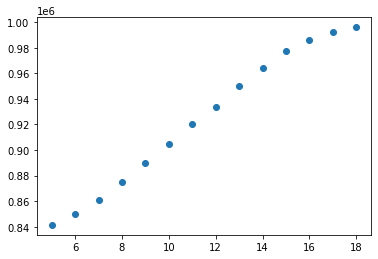

In [133]:
plt.scatter(Y,X)

In [134]:
import math

In [135]:
from scipy.optimize import curve_fit
def F(x,a,b):
    return a*x+b

params = curve_fit(F, xdata=Y, ydata=X)

In [136]:
params

(array([ 13027.72090425, 774762.85246468]),
 array([[  149783.38253452, -1722508.90516021],
        [-1722508.90516021, 22242832.44913608]]))

In [137]:
from matplotlib import pyplot as plt

In [138]:
z=[i for i in range(20)]

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

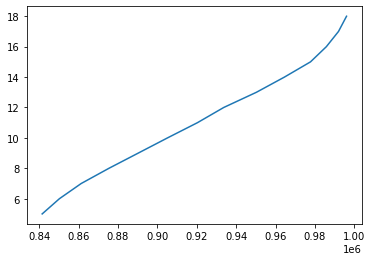

In [139]:
plt.plot(X,Y)
plt.plot(z,z*params[0][0]**2+params[0][1]*z+params[0][2])

In [ ]:
#Code checking if there are indeed 19 instances per city
for v in filtered_data2['METROREG'].unique():
    print(filtered_data2[filtered_data2['METROREG'] == v])

In [ ]:
[0,0,0].count(0)

In [ ]:
def treat_missing(k,t): #t is a threshold for the number of zeros (mising value we allow)
    L1 = list(k.employed_persons)
    L2 = list(k.gdp)
    L3 = list(k.population) 
    
    if L1.count(0)>t,
    

In [ ]:
#need to check if there are zeros in subdataframe
def treat_missing(k):
    #nested helper function
    #needed because .index() doesn't retrieve position for more than one value
    #eg: for l=[0,0,2], l.index(0) returns 0 and not (0,1)
    def get_zeros(k):
        z=[]
        for i in range(len(k)):
            if k[i]==0:
                z.append(i)
        return z  
    #turns the dataframe into lists
    L1 = list(k.employed_persons)
    L2 = list(k.gdp)
    L3 = list(k.population) 
    z1=get_zeros(L1)
    z2=get_zeros(L2)
    z3=get_zeros(L3)
    #for missing single values at either ends 
    
    #employed_persons
    if len(z1) == 1 and z1[0] == 0:
        L1[0] = L1[1] - abs(L1[1]-L1[2])
        k.employed_persons = L1
    if len(z1) == 1 and z1[0] == 18:
        L1[18] = L1[17] + abs(L1[17]-L1[16])
        k.employed_persons = L1
    
    #gdp
    if len(z2) == 1 and z2[0] == 0:
        L2[0] = L2[1] - abs(L2[1]-L2[2])
        k.gdp = L2
    if len(z2) == 1 and z2[0] == 18:
        L2[18] = L2[17] + abs(L2[17]-L2[16])
        k.gdp = L2
    
    #population
    if len(z3) == 1 and z3[0] == 0:
        L3[0] = L3[1] - abs(L3[1]-L3[2])
        k.population = L3
    if len(z3) == 1 and z3[0] == 18:
        L3[18] = L3[17] + abs(L3[17]-L3[16])
        k.population = L3
    #For missing values at ends (more than one)
    #nested function
    #[0,1]->True
    #[0,2]->False
    def evenly_spaced(l):
        for i in range(len(l)-1):
            if abs(l[i]-l[i+1])!=1:
                return False
        return True

    #employed_persons
    if (len(z1) >1) and evenly_spaced(z1) == True and z1[0] == 0:
        for i in reversed(z1):
            L1[i] = L1[i+1] - abs(L1[i+1] - L1[i+2])
        k.employed_persons = L1
    
    #gdp
    if (len(z2) >1) and evenly_spaced(z2) == True and z2[0] == 0:
        for i in reversed(z2):
            L2[i] = L2[i+1] - abs(L2[i+1] - L2[i+2])
        k.gdp = L2
        
    #population
    if (len(z3) >1) and evenly_spaced(z3) == True and z3[0] == 0:
        for i in reversed(z3):
            L3[i] = L3[i+1] - abs(L3[i+1] - L3[i+2])
        k.population = L3
        
    #other end 
    #employed_persons
    if (len(z1) >1) and evenly_spaced(z1) == True and z1[-1] == 18:
        for i in z1:
            L1[i] = L1[i-1] + abs(L1[i-1] - L1[i-2])
        k.employed_persons = L1
    #gdp
    if (len(z2) >1) and evenly_spaced(z2) == True and z2[-1] == 18:
        for i in z2:
            L2[i] = L2[i-1] + abs(L2[i-1] - L2[i-2])
        k.gdp = L2
    #population
    if (len(z3) >1) and evenly_spaced(z3) == True and z3[-1] == 18:
        for i in z3:
            L3[i] = L3[i-1] + abs(L3[i-1] - L3[i-2])
        k.population = L3
    #If values are missing in the middle of the dataframe: -> apply what Simon showed on excel
    #employed_persons
    if ((len(z1) >1) and evenly_spaced(z1) == True) and (z1[-1] != 18 and z1[0] != 0):
        p = L1[z1[0]-1] - L1[z1[-1]+1]
        add = p/(len(z1)+1)
        for i in z1:
            L1[i]=L1[i-1]+add
        k.employed_persons=L1
    #gdp
    if ((len(z2) >1) and evenly_spaced(z2) == True) and (z2[-1] != 18 and z2[0] != 0):
        print(L2)
        print(z2)
        p = L2[z2[0]-1] - L2[z2[-1]+1]
        add = p/(len(z2)+1)
        for i in z2:
            L2[i]=L2[i-1]+add
        k.gdp=L2
    #population
    if ((len(z3) >1) and evenly_spaced(z3) == True) and (z3[-1] != 18 and z3[0] != 0):
        p = L3[z3[0]-1] - L3[z3[-1]+1]
        add = p/(len(z3)+1)
        for i in z3:
            L3[i]=L3[i-1]+add
        k.population=L3
    #more complicated cases
    #0xxx000
    #000xxx0
    #000xxx000
    #3rd helper function for 
    def get_sep(l):
        for i in range(len(l)-1):
            if abs(l[i]-l[i+1])!=1:
                t=(l[i],l[i+1])
        return t
    #0xxx000
    if evenly_spaced(z1) == False and len(z1)>1 and z1[0]==0:
        L1[0] = L1[1] - abs(L1[1]-L1[2])
        p = L1[z1[0]-1] - L1[z1[-1]+1]
        add = p/(len(z1))
        for i in z1[get_sep(z1)[1]:]:
            L1[i]=L1[i-1]+add
        k.employed_persons=L1
    
    #gdp
    if evenly_spaced(z2) == False and len(z2)>1 and z1[0]==0:
        L2[0] = L2[1] - abs(L2[1]-L2[2])
        p = L2[z2[0]-1] - L2[z2[-1]+1]
        add = p/(len(z2))
        for i in z2[get_sep(z2)[1]:]:
            L2[i]=L2[i-1]+add
        k.gdp=L2
    
    #population
    if evenly_spaced(z3) == False and len(z3)>1 and z3[0]==0:
        L3[0] = L3[1] - abs(L3[1]-L3[2])
        p = L3[z3[0]-1] - L3[z3[-1]+1]
        add = p/(len(z3))
        for i in z3[get_sep(z3)[1]:]:
            L3[i]=L3[i-1]+add
        k.population=L3
    
    #000xxx0
    if evenly_spaced(z1) == False and len(z1)>1 and z1[-1]==18:
        L1[18] = L1[17] + abs(L1[17]-L1[16])
        p = L1[z1[0]-1] - L1[z1[-1]+1]
        add = p/(len(z1))
        for i in z1[:get_sep(z1)[1]]:
            L1[i]=L1[i-1]+add
        k.employed_persons=L1
    
    #gdp
    if evenly_spaced(z2) == False and len(z2)>1 and z1[-1]==18:
        L2[0] = L2[1] - abs(L2[1]-L2[2])
        p = L2[z2[0]-1] - L2[z2[-1]+1]
        add = p/(len(z2))
        for i in z2[get_sep(z2)[1]:]:
            L2[i]=L2[i-1]+add
        k.gdp=L2
    
    #population
    if evenly_spaced(z3) == False and len(z3)>1 and z3[-1]==18:
        L3[0] = L3[1] - abs(L3[1]-L3[2])
        p = L3[z3[0]-1] - L3[z3[-1]+1]
        add = p/(len(z3))
        for i in z3[get_sep(z3)[1]:]:
            L3[i]=L3[i-1]+add
        k.population=L3
    
    
        
        
        
        
        
                
        
        
    
    return

In [ ]:
get_sep([1,2,4])[0]

In [ ]:
def get_sep(l):
    for i in range(len(l)-1):
        if abs(l[i]-l[i+1])!=1:
            t=(l[i],l[i+1])
    return t

In [ ]:
 Yo=filtered_data2[filtered_data2['METROREG'] == 'Bergen']

In [ ]:
treat_missing(Yo)

In [ ]:
Yo

In [ ]:
for v in filtered_data2['METROREG'].unique():
    treat_missing(filtered_data2[filtered_data2['METROREG'] == v])

In [ ]:
filtered_data2[20:]

In [ ]:
filtered_data3 = filtered_data2[(filtered_data2['TIME']>=2000) & (filtered_data2['population']>500000) & (filtered_data2['gdp']>40000)]

In [ ]:
filtered_data3 = filtered_data3[filtered_data3['METROREG'].apply(lambda x: len(x) < 27)]

In [ ]:
import geopy
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="Master-Student")
def get_coord(k):
    assert type(k)==str
    return (geolocator.geocode(k).latitude,geolocator.geocode(k).longitude)

In [ ]:
latlong=[0 for i in range(filtered_data3.shape[0])]

In [ ]:
filtered_data3['latitude'] = latlong
filtered_data3['longitude'] = latlong

In [ ]:
filtered_data3

In [ ]:
d={}
for i in sorted(set(list(filtered_data3.METROREG))):
    print(i)
    d[i]=get_coord(i)

In [ ]:
for i in range(len(list(d.keys()))):
    for idx, row in filtered_data3.iterrows():
            filtered_data3.loc[idx,'latitude'] = list(d.values())[i][0]
            filtered_data3.loc[idx,'longitude'] = list(d.values())[i][1]

In [ ]:
d2=dict(filtered_data3['METROREG'].value_counts())

In [ ]:
d2

In [ ]:
for i in d2.keys():
    if d2[i]<10:
        filtered_data3=filtered_data3[filtered_data3.METROREG!=i]

In [ ]:
filtered_data3